In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [3]:
path = Path(".")
if not path.joinpath("cf-graph-countyfair").is_dir():
    !git clone https://github.com/regro/cf-graph-countyfair --depth=1
    !ln -s cf-graph-countyfair/graph.json graph.json

if not path.joinpath("cf-scripts").is_dir():
    !git clone https://github.com/regro/cf-scripts
    !ln -s cf-scripts/conda_forge_tick  conda_forge_tick

In [4]:
cd cf-graph-countyfair

/home/christopher/dev/conda-forge/by-the-numbers/cf-graph-countyfair


In [5]:
gx = load_graph()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
a = 'created_at'
b = 'closed_at'

In [8]:
import datetime
import time

In [9]:
def get_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%SZ')

In [10]:
elapsed = []
started = []
for k, node in gx.nodes.items():
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"] and pr['data']['migrator_name'] == 'Version':
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

In [11]:
df = pd.DataFrame({'elapsed': elapsed, 'started': started})
df = df.set_index('started')
df.index = pd.to_datetime(df.index, utc=True)
df.index = pd.DatetimeIndex(df.index)

In [12]:
elapsed = []
started = []
for k, node in gx.nodes.items():
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"] and pr['data']['migrator_name'] != 'Version':
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

In [14]:
df2 = pd.DataFrame({'elapsed': elapsed, 'started': started})
df2 = df2.set_index('started')
df2.index = pd.to_datetime(df2.index, utc=True)
df2.index = pd.DatetimeIndex(df2.index)

In [15]:
cd ..

/home/christopher/dev/conda-forge/by-the-numbers


In [18]:
len(df), len(df2), sum((len(df), len(df2)))

(30233, 16313, 46546)

In [19]:
df['count'] = [1] * len(df)
df2['count'] = [1] * len(df2)

In [1]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3 = df.resample('W').sum().plot(y='count', ax=ax)
        ax.set_title(f"Number of Version Bump PRs")
        ax.set_xlabel("Date (Aggregated by Week)")
        ax.set_ylabel("Number of PRs")
        fig.savefig(f"plots/version_bumps-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)

NameError: name 'plt' is not defined

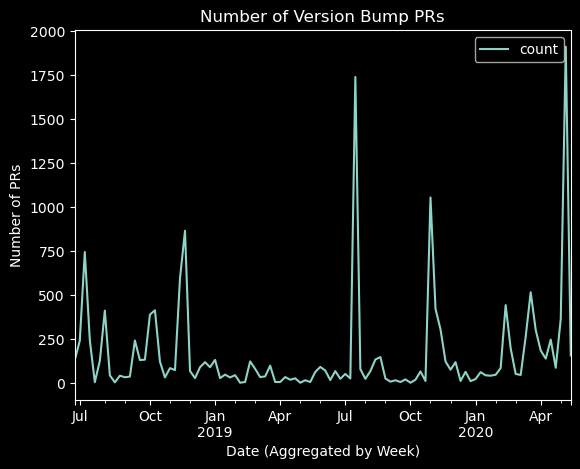

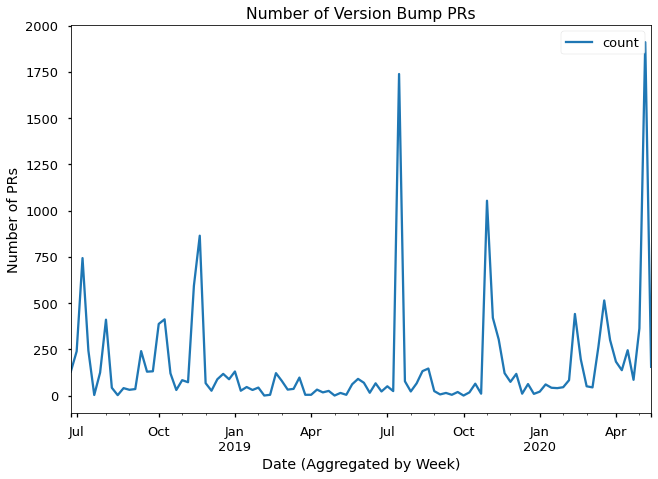

In [21]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3 = df2.resample('W').sum().plot(y='count', ax=ax)
        ax.set_title(f"Number of Version Bump PRs")
        ax.set_xlabel("Date (Aggregated by Week)")
        ax.set_ylabel("Number of PRs")
        fig.savefig(f"plots/migrations-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)

In [22]:
print(len(df), len(df) - df['elapsed'].count(), (len(df) - df['elapsed'].count())/len(df) * 100)

30233 2089 6.909668243310291


In [23]:
print(len(df2), len(df2) - df2['elapsed'].count(), (len(df2) - df2['elapsed'].count())/len(df2) * 100)

16313 1198 7.343836204254275
